In [28]:
import pandas as pd
from pandas import Series, DataFrame

In [29]:
titanic_df = pd.read_csv('train (4).csv')

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

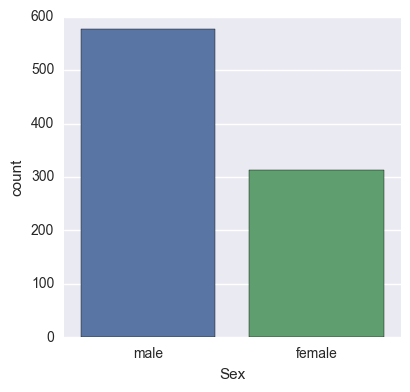

In [33]:
sns.factorplot('Sex',data=titanic_df,kind='count')
#had to input kind='count' to get the bar graphs.
# try sns.factorplot('Sex',data=titanic_df,kind)... and see how that looks.

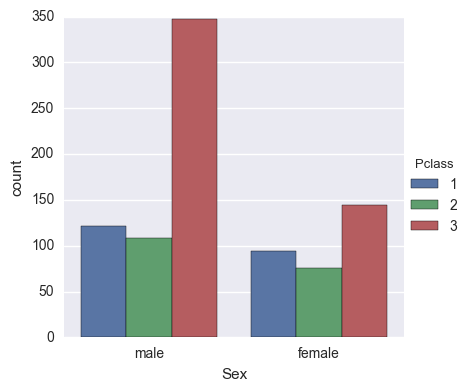

In [34]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

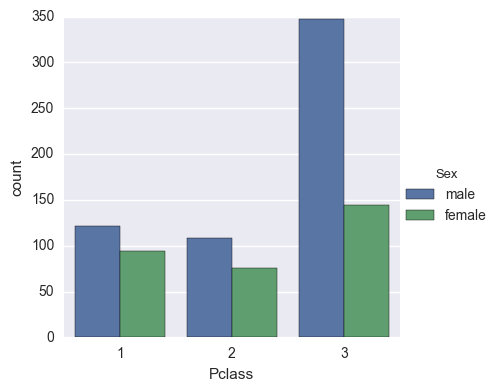

In [35]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [37]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
#if the age is less than 16, sex for the person will return 'child', not their sex. 

In [38]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
#this line of code adds a new column and plugs the 'child' formula in. 

In [39]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


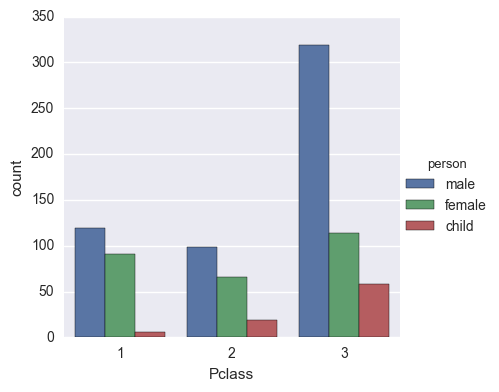

In [41]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

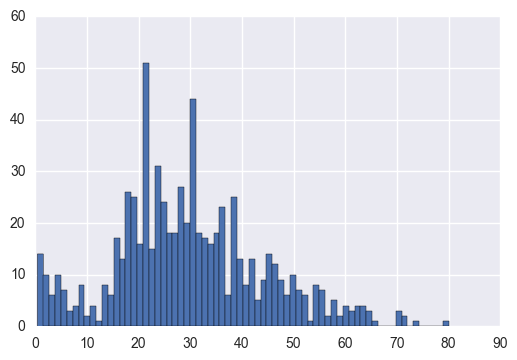

In [42]:
titanic_df['Age'].hist(bins=70)

In [43]:
titanic_df['Age'].mean()

29.69911764705882

In [45]:
titanic_df['Age'].median()

28.0

In [47]:
titanic_df['Age'].std()

14.526497332334044

In [48]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

/Users/owner/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


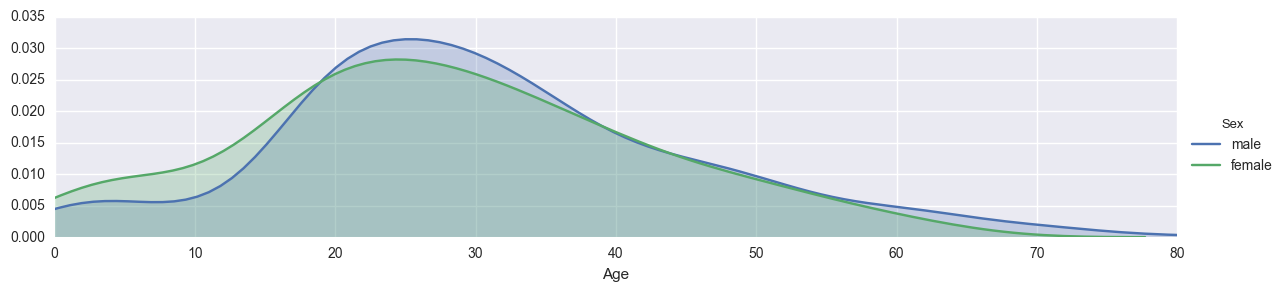

In [53]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
#aspect will stretch the graph out as the value increases. 
#hue will dictate which values are being mapped and compared. 

fig.map(sns.kdeplot,'Age',shade=True)
#shaded map

oldest = titanic_df['Age'].max()
#setting a variable

fig.set(xlim=(0,oldest))
#setting the limits

fig.add_legend()
#legend to the right. 

/Users/owner/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


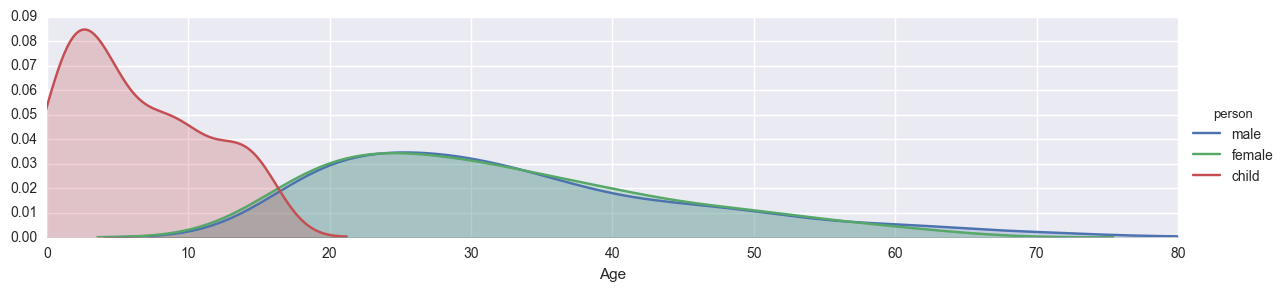

In [54]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
#aspect will stretch the graph out as the value increases. 
#hue will dictate which values are being mapped and compared.

fig.map(sns.kdeplot,'Age',shade=True)
#shaded map

oldest = titanic_df['Age'].max()
#setting a variable

fig.set(xlim=(0,oldest))
#setting the limits

fig.add_legend()
#legend to the right. 

#Note: bandwidth shows the age disappear after 20, but really is disappears after 16. 

/Users/owner/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


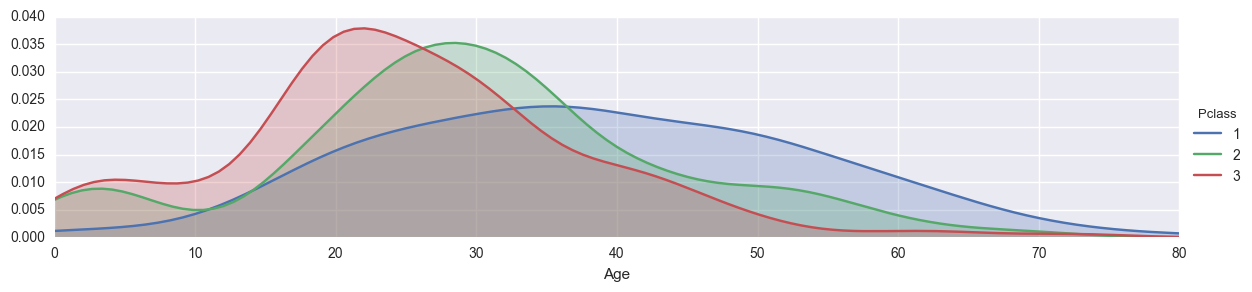

In [55]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
#aspect will stretch the graph out as the value increases. 
#hue will dictate which values are being mapped and compared.

fig.map(sns.kdeplot,'Age',shade=True)
#shaded map

oldest = titanic_df['Age'].max()
#setting a variable

fig.set(xlim=(0,oldest))
#setting the limits

fig.add_legend()
#legend to the right. 

#Note: bandwidth shows the age disappear after 20, but really is disappears after 16. 

In [67]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [68]:
deck = titanic_df['Cabin'].dropna()
#created deck, which is 'Cabin' with all of the 'NaN' dropped. 

In [69]:
deck.head()
#preview of the new deck variable. 

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

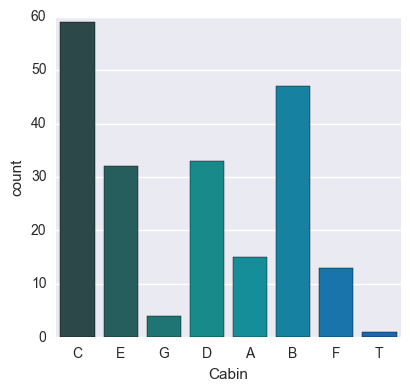

In [70]:
levels = []
#created an empty list called 'levels'

for level in deck:
    levels.append(level[0])
#for every level in the deck, append the first letter. 
    
cabin_df = DataFrame(levels)
#created a df from the list 'levels'

cabin_df.columns = ['Cabin']
#set columns to 'Cabin'

sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')
#plot it out.

#NOTE!!!
#look at more color palettes on matplotlib/users/colormaps.html
#make color map darker by inputting '_d' after your color map selection. 

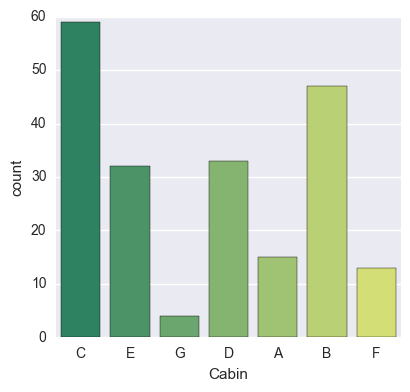

In [71]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#redefined cabin_df so that everything does not equal 'T'

sns.factorplot('Cabin',data=cabin_df, palette='summer',kind='count')

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


/Users/owner/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


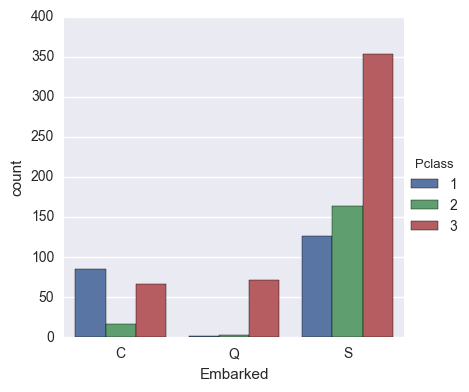

In [75]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',x_order=['C','Q','S'],kind='count')
#NOTE!
#this graph will show the where people came from, and what class ticket they bought.
#this is an indication of socio economic of that town. 

In [77]:
#Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [78]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
#Created a new column that adds the SibSp value with the Parch value. 

In [79]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [82]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
#in the 'Alone' column, in the locations where 'Alone' > 0, reset the value to equal 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
#in the 'Alone' column, in the locations where 'Alone' == 0, reset the value to equal 'Alone'


TypeError: unorderable types: str() > int()

In [81]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


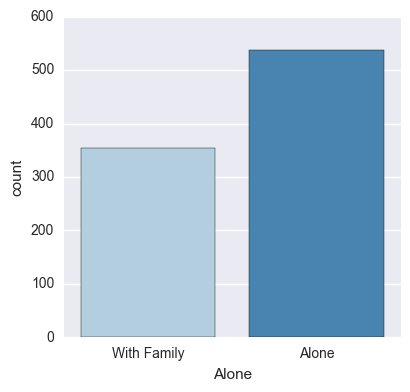

In [83]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

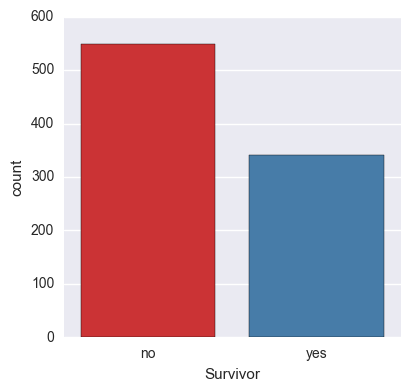

In [86]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
#redefine the 'Survivor' column values from int to strings.

sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')
#graph the results.

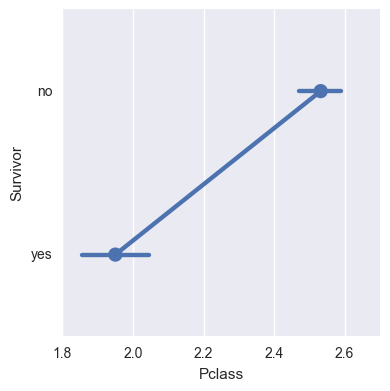

In [89]:
sns.factorplot('Pclass','Survivor',data=titanic_df)

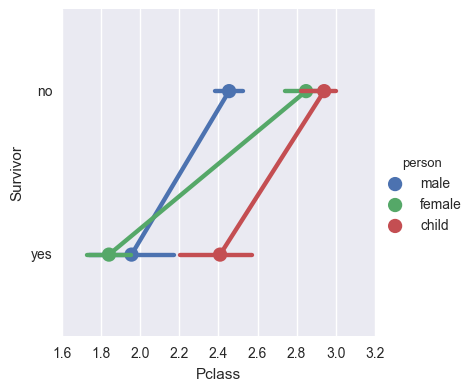

In [90]:
sns.factorplot('Pclass','Survivor',hue='person',data=titanic_df)
#input the hue arguement to compare other columns to each other.

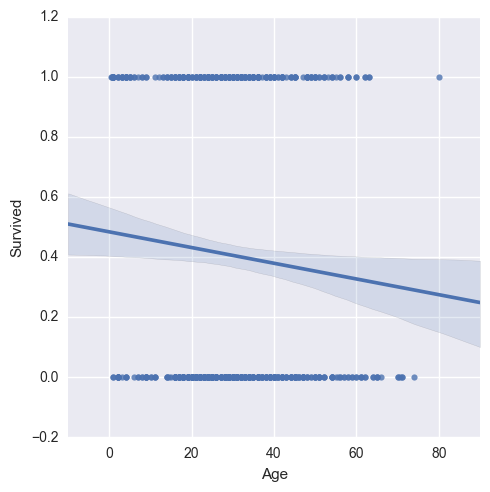

In [91]:
sns.lmplot('Age','Survived',data=titanic_df)

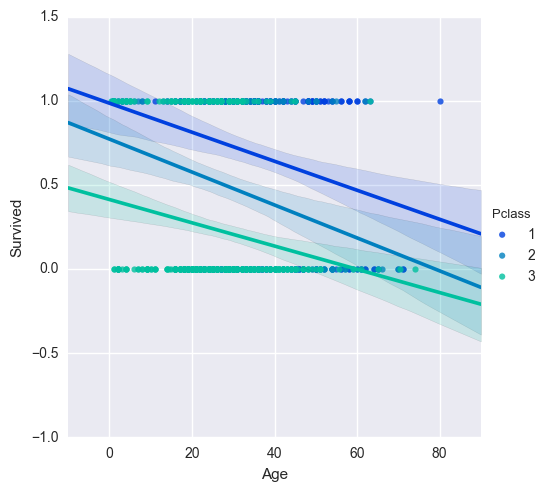

In [93]:
sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='winter')

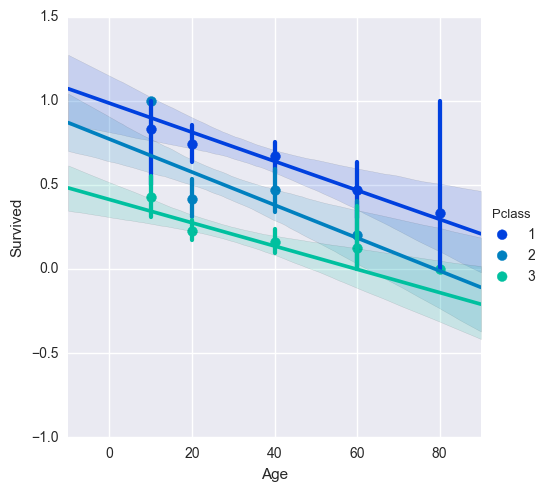

In [94]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

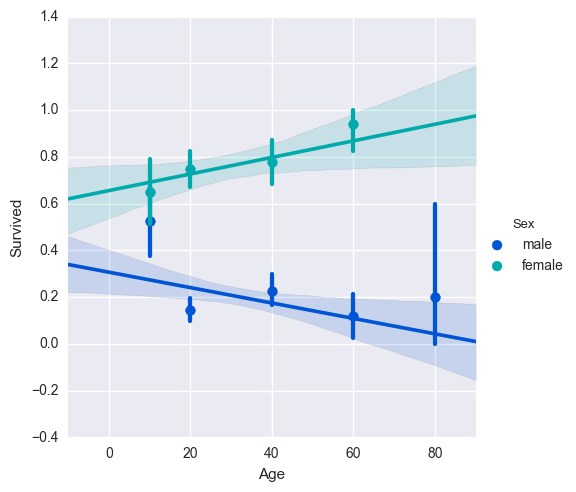

In [95]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df, palette='winter',x_bins=generations)

Question 1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [137]:
titanic_df['CABIN'] = cabin_df.Cabin
#1. Add a new column from the cabin_df.

In [138]:
titanic_df.head()
#2. Test the revised titanic_df.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CABIN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


/Users/owner/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


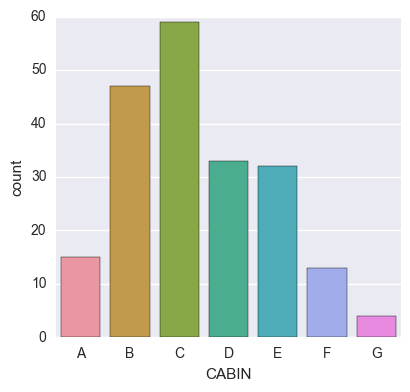

In [151]:
sns.factorplot('CABIN',data=titanic_df,x_order=['A','B','C','D','E','F','G'],kind='count')
#3. This is a graph of the recorded number of people per cabins.

/Users/owner/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


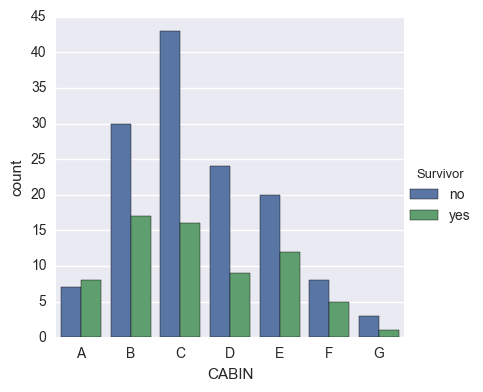

In [149]:
sns.factorplot('CABIN',data=titanic_df,hue='Survivor',x_order=['A','B','C','D','E','F','G'],kind='count')
#4. Graphed the 'CABIN' with 'Survivor' with a factor plot. 
#Seems that the people from cabin 'A' had a much greater chance of surviving over the other cabins. 

Question 2. Did having a family member increase the odds of surviving the crash

In [152]:
titanic_df.head()
#1. Preview the titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CABIN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


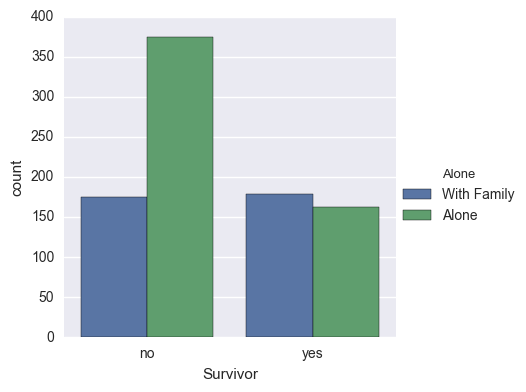

In [154]:
sns.factorplot('Survivor',data=titanic_df,hue='Alone',kind='count')
#2. Plot the 'Survivor' column vs. 'Alone' column.
#Seems that the having family slightly improved your chances of survival, but not by much. 